In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
from scipy.stats import skew

In [3]:
salary_data = pd.read_csv('Salary_Data.csv')

# Exploratory Data Analysis

In [5]:
salary_data.shape

(30, 2)

In [6]:
salary_data.head(3)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


In [7]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [13]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [16]:
data = salary_data.rename(columns={'YearsExperience':'YE','Salary':'Sal'}, inplace=False)

In [17]:
data

,YE,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [18]:
print(skew(data.YE))

0.3603123252525561


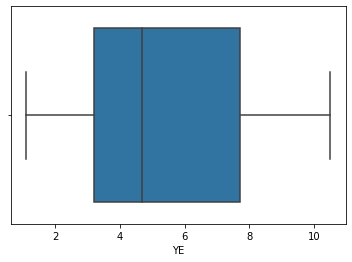

In [19]:
sns.boxplot(data['YE'], orient = 'h')

- The data for Year Experience is skewed right.
- All the observations lies in the intervals of approximately 3 to 8
- We can say that the median years of experience is 5.2 years.

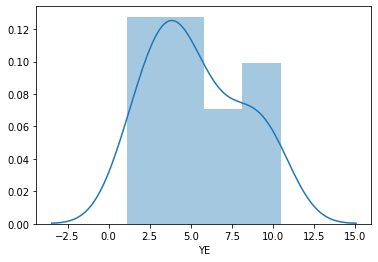

In [20]:
sns.distplot(data['YE'])

- The distribution of Year Experience data is slightly more on the RIGHT tail of the curve

In [21]:
print(skew(data.Sal))

0.3361618825592921


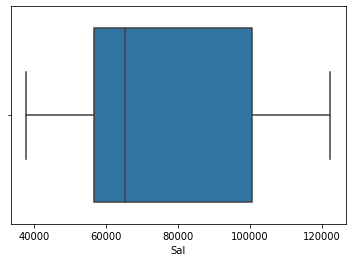

In [22]:
sns.boxplot(data['Sal'], orient='h')

- The onservations for Salary lies nearly between 57000 to 110000.
- The data is skewed towars right side.
- The median Salary is nearly 65000.

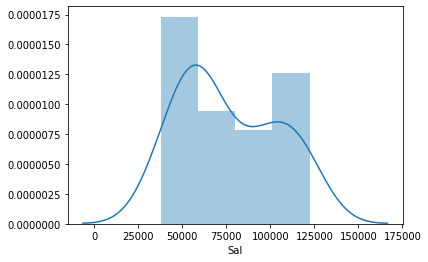

In [25]:
sns.distplot(data['Sal'])

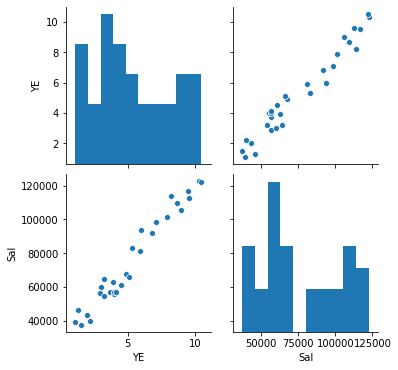

In [26]:
sns.pairplot(data)

- There's strong positive relation between Years Experience and Salary

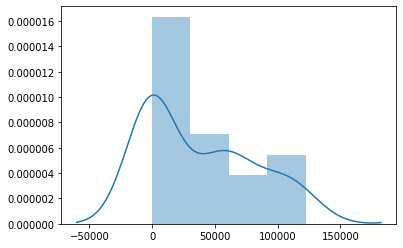

In [27]:
sns.distplot(data)

- Data distribution is not normal for this dataset
- We can see that most of the data is distributed towards the right tail of distplot

In [28]:
data.corr()

,YE,Sal
YE,1.000000,0.978242
Sal,0.978242,1.000000


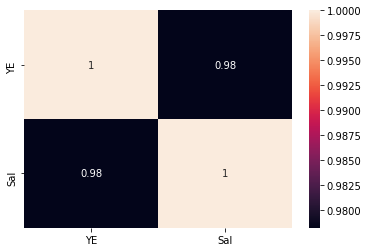

In [29]:
sns.heatmap(data.corr(), annot=True)

- We can see there's a strong positive relation between Years Experience and Salary 

Text(0, 0.5, 'Salary')

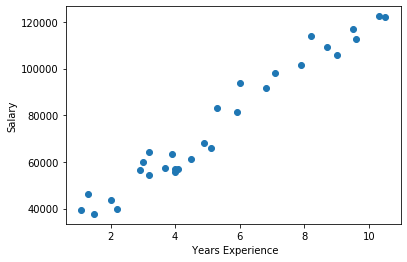

In [30]:
plt.scatter(data['YE'], data['Sal'])
plt.xlabel(" Years Experience")
plt.ylabel("Salary")

- There's a pattern in YearsExperience and Salary which shows a they have a positive relation. 

## Model Building 

In [31]:
data1 = data.copy()

In [32]:
data1.head()

,YE,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Model 1 

- Linear Model

In [33]:
model1 = sm.ols('Sal~YE', data=data1).fit()
model1

In [34]:
model1.params

Intercept    25792.200199
YE            9449.962321
dtype: float64

In [35]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           1.14e-20
Time:                        14:59:32   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YE          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

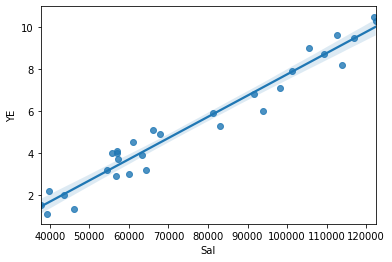

In [36]:
sns.regplot(x="Sal", y="YE", data=data1);

In [38]:
pred = model1.predict(data1.iloc[:,0])
pred.iloc[0:5]

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

In [39]:
pd.set_option("display.max_rows", 21) 
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
          ...      
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
Length: 30, dtype: float64

Text(0, 0.5, 'Actual')

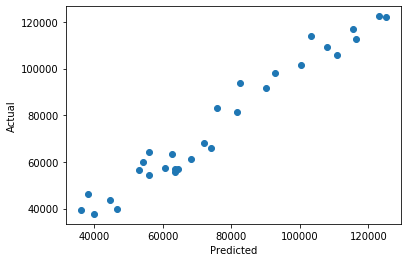

In [41]:
plt.scatter(x=pred,y=data1.Sal)
plt.xlabel("Predicted")
plt.ylabel("Actual")

- rmse = sq([mean(AV-PV)^2])
---
- The less value of RMSE, The better is model. 

In [42]:
rmse_model1 = np.sqrt(np.mean((np.array(data1['Sal'])-np.array(pred))**2))
rmse_model1 

5592.043608760662

In [43]:
model1.resid
model1.resid_pearson

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

Text(0, 0.5, 'Standardized Residual')

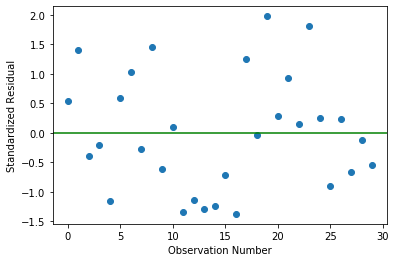

In [44]:
plt.plot(model1.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

In [45]:
pred.corr(data1['Sal'])

0.9782416184887601

Text(0, 0.5, 'Sal')

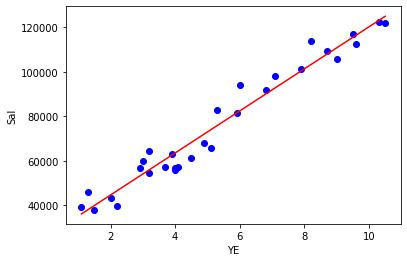

In [47]:
plt.scatter(x=data1['YE'],y=data1['Sal'],color='blue')
plt.plot(data1.YE,pred,color='red')
plt.xlabel('YE')
plt.ylabel('Sal')

In [48]:
print('R-Squared:',model1.rsquared, '\nRMSE:', rmse_model1)

R-Squared: 0.9569566641435086 
RMSE: 5592.043608760662


### Model 2
---
- Log Model 

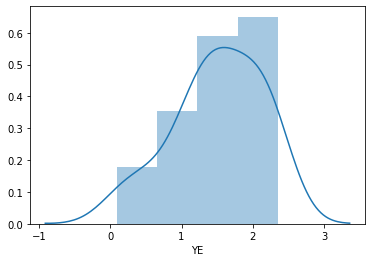

In [49]:
YE_log = np.log(data1['YE'])
sns.distplot(YE_log)

In [51]:
model2 = sm.ols('Sal ~ np.log(YE)', data = data1).fit()
model2

In [52]:
model2.params

Intercept     14927.97177
np.log(YE)    40581.98796
dtype: float64

In [53]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sal   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           3.25e-13
Time:                        15:27:41   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YE)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
pred2 = model2.predict(data1['YE'])
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
          ...      
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
Length: 30, dtype: float64

In [55]:
model2.resid_pearson

array([ 1.92668535,  1.9344319 ,  0.59528747,  0.04385928, -0.65958399,
       -0.14009554,  0.05983938, -0.72070308,  0.21698667, -1.01586668,
       -0.65086038, -1.4433439 , -1.33429059, -1.41662681, -1.39297775,
       -1.07687064, -1.40810917,  0.04511883, -0.52473744,  0.5906383 ,
       -0.09212822,  0.35636761,  0.23410631,  1.26532617,  0.62929102,
        0.1393676 ,  1.00137122,  0.55512972,  1.20211758,  1.08026978])

Text(0, 0.5, 'Standardized Residual')

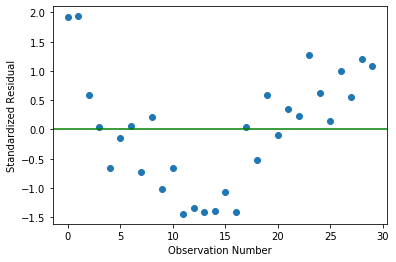

In [56]:
plt.plot(model2.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

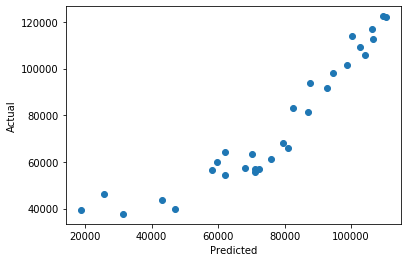

In [57]:
plt.scatter(x=pred2,y=data1.Sal)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [58]:
pred2.corr(data1.Sal)

0.9240610817882637

In [59]:
rmse_model2 = np.sqrt(np.mean((np.array(data1.Sal)- np.array(pred2))**2))
rmse_model2

10302.893706228308

In [60]:
print('R-Squared:',model2.rsquared, '\nRMSE:', rmse_model2)

R-Squared: 0.8538888828756969 
RMSE: 10302.893706228308


Text(0.5, 0, 'YE')

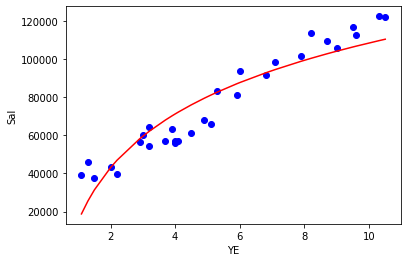

In [63]:
plt.scatter(x=data1.YE, y=data1.Sal, color='blue')
plt.plot(data1.YE, pred2, color='red')
plt.ylabel('Sal')
plt.xlabel('YE')

### Model 3
---
- Exponential Model 

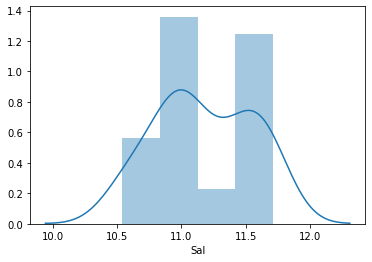

In [64]:
Sal_log= np.log(data1.Sal)
sns.distplot(Sal_log)

In [65]:
model3 =  sm.ols("np.log(Sal)~YE", data=data1).fit()
model3

In [66]:
model3.params

Intercept    10.507402
YE            0.125453
dtype: float64

In [67]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(Sal)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           7.03e-18
Time:                        15:30:00   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
YE             0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
model3.resid_pearson

array([-0.66732261,  0.71866312, -1.60729238, -0.78878267, -1.9356925 ,
        0.74867647,  1.23436001, -0.0398886 ,  1.68260228, -0.17836411,
        0.58917114, -0.81508595, -0.60434465, -0.71028167, -0.52600626,
        0.04320755, -0.50424366,  1.58695853,  0.60373565,  1.94386552,
        0.6763497 ,  0.99482518,  0.27970841,  1.0847233 ,  0.04297985,
       -0.70724335, -0.30175692, -0.81559685, -0.86410542, -1.1638191 ])

Text(0, 0.5, 'Standardized Residual')

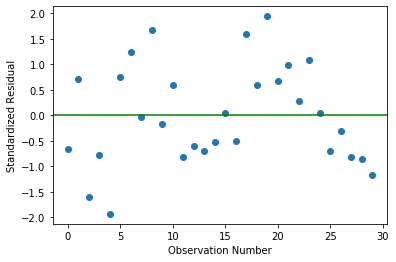

In [69]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

In [70]:
pred3_logs = model3.predict(data1.YE)
pred3_logs.iloc[:5]

0    10.645400
1    10.670491
2    10.695581
3    10.758308
4    10.783398
dtype: float64

In [71]:
pred3 = np.exp(pred3_logs)
pred3.iloc[0:5]

0    41998.957468
1    43066.066794
2    44160.289228
3    47019.029189
4    48213.688474
dtype: float64

Text(0, 0.5, 'Actual Values')

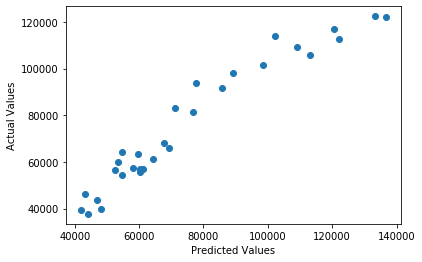

In [72]:
plt.scatter(y=data1.Sal, x=pred3)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [73]:
pred3.corr(data1.Sal)

0.9660469705377085

In [74]:
rmse_model3 = np.sqrt(np.mean((np.array(data1.Sal)- np.array(pred3))**2))
rmse_model3

7213.235076620129

In [75]:
print("R-Squared",model3.rsquared, "\nRMSE:", rmse_model3)

R-Squared 0.9319671194084195 
RMSE: 7213.235076620129


Text(0, 0.5, 'Sal')

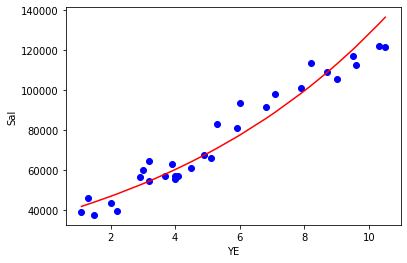

In [76]:
plt.scatter(x=data1.YE, y=data1.Sal, color='Blue')
plt.plot(data1.YE, pred3, color='r')
plt.xlabel('YE')
plt.ylabel('Sal')

### Model 4
---
- Quadratic model 

In [97]:
data1['YE_sq'] = data1.YE * data1.YE
indep = data1[['YE_sq','YE']]
indep

,YE_sq,YE
0,1.21,1.1
1,1.69,1.3
2,2.25,1.5
3,4.00,2.0
4,4.84,2.2
...,...,...
25,81.00,9.0
26,90.25,9.5
27,92.16,9.6
28,106.09,10.3


In [110]:
model4 = sm.ols('Sal~YE+YE_sq', data=data1).fit()
model4

In [111]:
model4.params

Intercept    26214.932677
YE            9259.283888
YE_sq           16.392566
dtype: float64

In [112]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           3.59e-19
Time:                        15:42:42   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
YE          9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
YE_sq         16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
model4.resid_pearson

array([ 0.49599337,  1.34480558, -0.40889762, -0.216191  , -1.14939647,
        0.58325613,  1.01975445, -0.26598179,  1.43087065, -0.59554384,
        0.10902773, -1.31002935, -1.11268541, -1.2510139 , -1.20521653,
       -0.68569964, -1.32942469,  1.24521743, -0.00888011,  1.96482474,
        0.30576341,  0.93170815,  0.15537476,  1.79335299,  0.24087569,
       -0.89836213,  0.22253223, -0.67531281, -0.15842562, -0.57229639])

Text(0, 0.5, 'Standardized Residual')

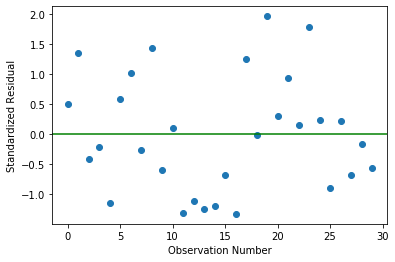

In [114]:
plt.plot(model4.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

In [115]:
pred4 = model3.predict(data1.YE)
pred4.iloc[:5]

0    10.645400
1    10.670491
2    10.695581
3    10.758308
4    10.783398
dtype: float64

Text(0, 0.5, 'Actual Values')

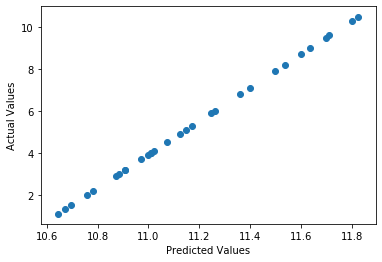

In [116]:
plt.scatter(y=data1.YE, x=pred4)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [117]:
pred4.corr(data1.Sal)

0.9782416184887599

In [118]:
rmse_model4 = np.sqrt(np.mean((np.array(data1.Sal)- np.array(pred4))**2))
rmse_model4

80630.25750602805

In [119]:
print("R-Squared",model4.rsquared, "\nRMSE:", rmse_model4)

R-Squared 0.956975168321065 
RMSE: 80630.25750602805


Text(0, 0.5, 'Sal')

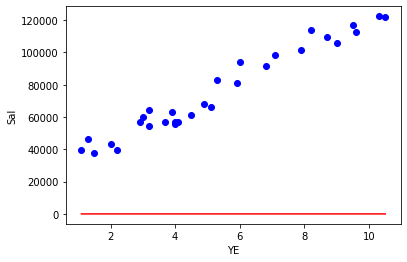

In [120]:
plt.scatter(x=data1.YE, y=data1.Sal, color='Blue')
plt.plot(data1.YE, pred4, color='r')
plt.xlabel('YE')
plt.ylabel('Sal')

- As the prediction line is not catching any data, it's the worst model not suitable for our dataset 

### Model 5
---
- Log-Quad Combination Model

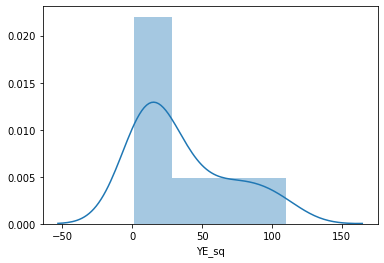

In [121]:
YE_sq = data1.YE * data1.YE
sns.distplot(data1.YE_sq)

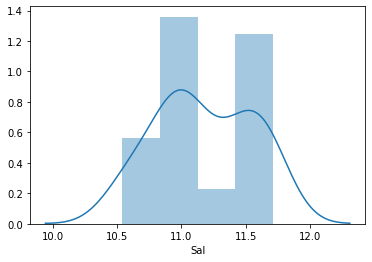

In [122]:
Sal_log= np.log(data1.Sal)
sns.distplot(Sal_log)

In [123]:
model5 = sm.ols('np.log(Sal)~YE+YE_sq', data=data1).fit()
model5

In [124]:
model4.params

Intercept    26214.932677
YE            9259.283888
YE_sq           16.392566
dtype: float64

In [125]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(Sal)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           3.95e-18
Time:                        15:44:33   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3369      0.067    154.368      0.000      10.199      10.474
YE             0.2024      0.027      7.601      0.000       0.148       0.257
YE_sq         -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
model5.resid_pearson

array([ 0.33014491,  1.75518283, -1.007666  , -0.39322574, -1.80253896,
        0.88141623,  1.38641973, -0.13623642,  1.8099461 , -0.4732964 ,
        0.33236092, -1.2827474 , -1.04463814, -1.19129314, -1.07566217,
       -0.50067653, -1.1441374 ,  1.19983096,  0.06913614,  1.5853479 ,
        0.22454994,  0.63632032,  0.03400283,  1.04587616,  0.06990424,
       -0.63879256,  0.08147566, -0.44208965, -0.05512012, -0.25379426])

Text(0, 0.5, 'Standardized Residual')

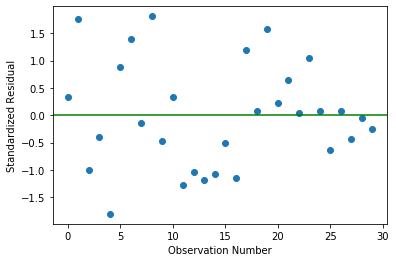

In [127]:
plt.plot(model5.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

In [128]:
pred5_logs = model5.predict(data1.YE)
pred5_logs.iloc[:5]

0    10.551469
1    10.588771
2    10.625544
3    10.715161
4    10.750082
dtype: float64

In [129]:
pred5 = np.exp(pred5_logs)  #since we took log of ST(dependet Variable)
pred5

0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
          ...      
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
Length: 30, dtype: float64

Text(0, 0.5, 'Actual Values')

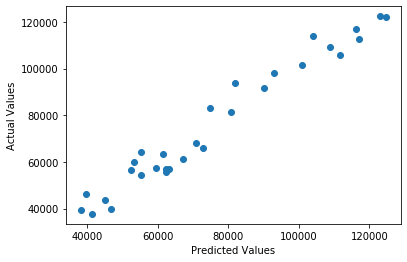

In [130]:
plt.scatter(y=data1.Sal, x=pred5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [131]:
rmse_model5 = np.sqrt(np.mean((np.array(data1.Sal)- np.array(pred5))**2))
rmse_model5

5391.081582693624

Text(0, 0.5, 'Sal')

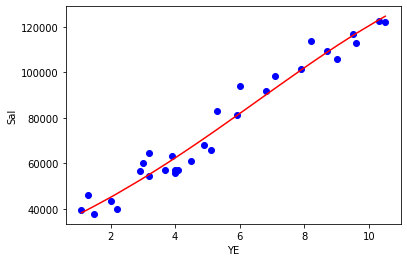

In [132]:
plt.scatter(x=data1.YE, y=data1.Sal, color='Blue')
plt.plot(data1.YE, pred5, color='r')
plt.xlabel('YE')
plt.ylabel('Sal')

### Model Evalution 

In [133]:
values = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad", "rmse_log-quad"]),
        "RMSE_Values":pd.Series([rmse_model1,rmse_model2,rmse_model3,rmse_model4, rmse_model5]),
        "Rsquare":pd.Series([model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared])}
table=pd.DataFrame(values)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,5592.043609,0.956957
1,rmse_log,10302.893706,0.853889
2,rmse_exp,7213.235077,0.931967
3,rmse_quad,80630.257506,0.956975
4,rmse_log-quad,5391.081583,0.948611


- So from above table, we can understand the logarithmic-Quadratic Combination model is the best model whereas The quadratic model is the worst model